# Project 3: 2D Simulation
### Written by John Rieffel

In this project I'll ask you to learn a little but about numpy 2D arrays, then implement a 2D convolution simulation environment, and then implement a variety of models within it.

This project is open-ended, and designed to challenge you.  Along the way you'll have plenty of opportunities to explore and learn concepts that challenge you.

---

## Part 1: The Simulator
### Written by John Rieffel

Implement a numpy 2-D array based convolution simulator.  You can use an object oriented model if you would like (and you probably *should* if you have taken CSC-120 or CSC-151).  You simulation should have the following features:

* have variable, rather than hard-coded size (rows,cols).  The size should stay fixed *during* simulation of course.
* a function to initialize the world, i.e. by adding cells at specified points.
* have your own `convolve()` function, which runs 2D convolution on the numpy array.  This function *should not* use the built-in numpy convolve method - I want you to roll your own!  This function should work with variable-sized kernels, not just `3x3` but also `5x5`, `7x7` etc.  (always an odd number).

* have a `step()` function, which modifies the world array using convolution.
* have a `step_n_times` function, which steps a given number of times
* a means of visualizing the world.
* how will you handle boundary conditions?  You might want to learn how to implement keyword arguments (`kwargs`) in python functions.




#Imports

In [1]:
import numpy as np
from world import World
from neighborhood import Neighborhood
from reaction import Reaction

#World Class Testing

In [4]:
world = World(10, 10)
kernel = np.full((5,5), 1/25, np.float16)
world.set_cell(5, 5, 10)
world.set_cell(4, 4, 10)
world.set_cell(5, 4, 10)
world.set_cell(4, 5, 10)

print(world.world)
world.step_n_times(kernel, 3)
print(world.world)
print(world.get_kernel_bounds(kernel, (8,8)))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[0.06211979 0.11719506 0.17611282 0.23503055 0.2708935  0.2708935
  0.23503056 0.17611282 0.11719506 0.0621198 ]
 [0.11719507 0.21581823 0.30419484 0.40537965 0.46557826 0.4655783
  0.4053797  0.30419487 0.21581824 0.11719506]
 [0.1761128  0.30419484 0.40025637 0.52833843 0.59237945 0.5923795
  0.5283385  0.40025637 0.30419484 0.17611282]
 [0.23503056 0.40537965 0.52833843 0.6974067  0.7819409  0.78194094
  0.69740677 0.52833843 0.40537965 0.23503055]
 [0.27089354 0.4655782  0.5923795  0.7819409  0.8767217  0.8767217
  0.78194094 0.59237945 0.4655782  0.2708935 

## Part 2: Modeling Heat Diffusion

Using the system above, we modeled heat diffusing across a plane. For this, we used a simple averaging kernel.

# RESET SIMULATION

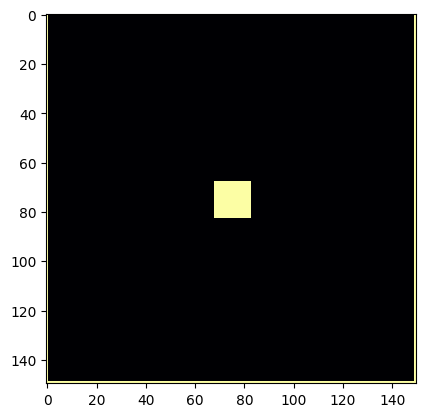

In [5]:
#Initialize simulation parameters
(rows, cols) = (150, 150)
hot_spot_temp = 200
metal_sheet = World(rows, cols)
kernel_size = 15
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size**2), np.float16)

#Create a centered heated block
block_size = 15
offset = rows//2 - block_size//2
for row in range(block_size):
  for col in range(block_size):
    metal_sheet.set_cell(row+offset, col+offset, hot_spot_temp)

#Add heated elements around all edges
metal_sheet.set_col(0, hot_spot_temp)
metal_sheet.set_col(cols-1, hot_spot_temp)
metal_sheet.set_row(0, hot_spot_temp)
metal_sheet.set_row(rows-1, hot_spot_temp)
metal_sheet.show()

# STEP ONCE

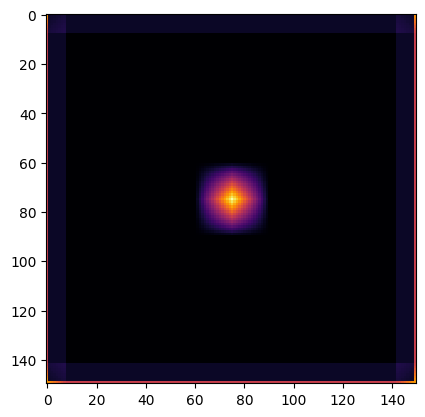

In [6]:
metal_sheet.step(kernel)
metal_sheet.show()

# STEP N TIMES

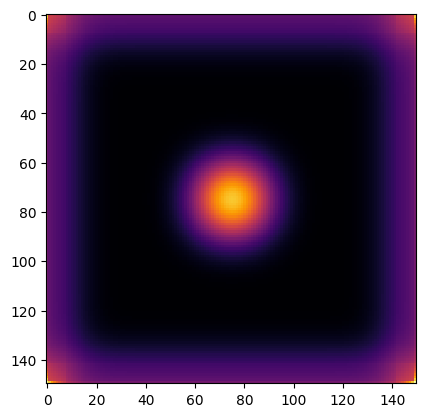

In [7]:
steps = 5
metal_sheet.step_n_times(kernel, steps)
metal_sheet.show()

## Part 3: Modeling Housing Segregation
### Written by John Rieffel
(below is excerpted from Downey's "Think Complexity")

In 1969 Thomas Schelling published “Models of Segregation”, which proposed a simple model of racial segregation. You can read it at http://thinkcomplex.com/schell.

The Schelling model of the world is a grid where each cell represents a house. The houses are occupied by two kinds of agents, labeled red and blue, in roughly equal numbers. About 10% of the houses are empty.


At any point in time, an agent might be happy or unhappy, depending on the other agents in the neighborhood, where the “neighborhood" of each house is the set of eight adjacent cells. In one version of the model, agents are happy if they have at least two neighbors like themselves, and unhappy if they have one or zero.

The simulation proceeds by choosing an agent at random and checking to see whether they are happy. If so, nothing happens; if not, the agent chooses one of the unoccupied cells at random and moves.




## Implementation

I again used the above "world" class as a baseline. Here, I actually use two worlds, one red and one blue, combined into a "neighborhood" class. I used a simple 3x3 kernel that checks the number of like neighbors for each individual and moves them accordingly.

#RESET SIMULATION

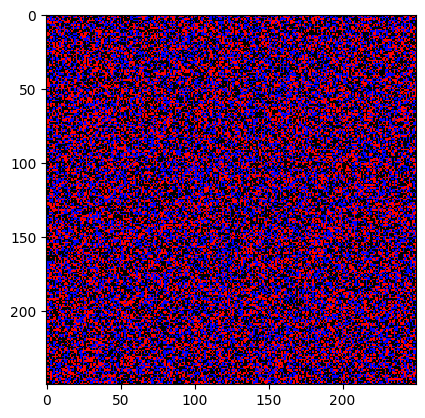

In [8]:
(rows, cols) = (250, 250)
(red_percent, blue_percent) = (30, 30) # percent of neighborhood that is red or blue
happy_threshold = 3 # how many similar neighbors required to stay put
neighborhood = Neighborhood(rows, cols, red_percent, blue_percent)
neighborhood.show()

#STEP ONCE

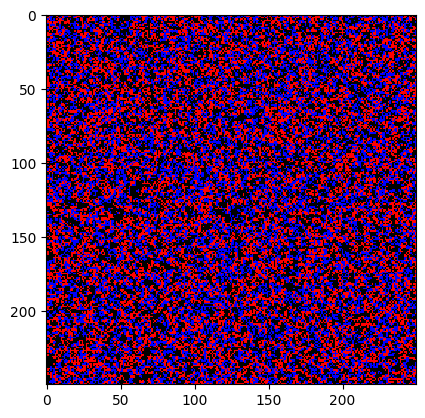

In [9]:
neighborhood.step(happy_threshold)
neighborhood.show()

#STEP N TIMES

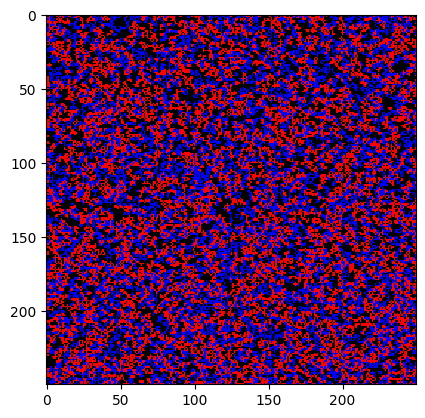

In [10]:
steps = 10
neighborhood.step_n_times(happy_threshold, steps)
neighborhood.show()

## Observations

I notice that the red and blue populations naturally form clusters around the neighborhood. The longer the simulation runs, the more defined these clusters become. Oddly, the vacant houses also seem to form clusters. Though, this would make sense because vacant houses do not contribute to an individual's happiness in the same way that a different color does not contribute to their happiness. So, though the vacant houses are not independent agents, it seems that the agents tend to move away from them.

## Reaction Diffusion Equations
### Written by John Rieffel
Karl Sims has an [interesting explanation](https://karlsims.com/rd.html) of Reaction-Diffusion equations, in which two chemicals circulating in a bath both diffuse through the medium and react with each other.

The below formulas are well explained and annotated on Sim's site.  Don't let the jargon and symbols confuse you.  I'll explain the terms below.

Imagine $A$ and $B$ are chemicals that react with one another.  Specifically, $A$ is converted to $B$ whenever $A$ is near two $B$.

$$A` = A + D_{A}\nabla^{2}A - AB^{2} + f(1-A) \Delta t$$

which can be rewritten as a change equation:

$$ A {+}{=} D_{A}\nabla^{2}A - AB^{2} + f(1-A) $$

Imagine $A$ refers to the percentage of chemical A at any cell in the model.

Where:
*  $D_{A}$ is a constant
*  $\nabla^{2}A$ means 2-D diffusion (using the kernel below)
* $AB^{2}$ means that an $A$ will become a B at any particular cell with a rate determined by the concentration of A and the square of the concentration of B in that cell.   We subtract this term from A (and add it to B)
* $f$ in the equation $f(1-A)$ is the rate at which A is added to the system at any cell.  So if the cell has no A, then $f$ A is added to the cell.

The equation for B is very similar:

$$ B {=} B + D_{B}\nabla^{2}B + AB^{2} - (k+f)B) \Delta t$$

or

 $$B {+}{=}  D_{B}\nabla^{2}B + AB^{2} - (k+f)B)$$

where $k$ is the rate at which B is removed from the system.

### Details

Implement the reaction-diffusion equation described by Sims.  To do this you'll need an array for each chemical.

#### Diffusion

Diffusion  via $\nabla^{2}A$ means each chemical spreads out in the environment. The *diffusion* step is a simple averaging kernel.  I think the following works best:

```
0 1  0
1 -4 1
0 1  0
```

#### Reaction

Reaction via $AB^{2}$ means multiplying each cell in A times the square of the corresponding cell in B.

### Feed and Kill

This means just increasing/or decreasing each cell at a certain rate proportional to its current contents.

### Implementation

Implement this system.  You could start by modifying your code from Part 2.


#RESET SIMULATION

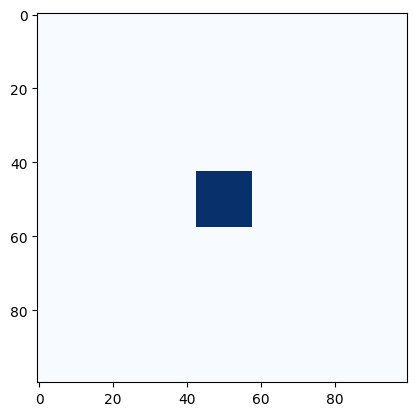

In [11]:
# kernel recommended by karl sims
sims_kernel = np.array([
  [0.05, 0.2, 0.05],
  [0.2, -1, 0.2],
  [0.05, 0.2, 0.05]], np.float16)

# kernel recommended by john rieffel
john_kernel = np.array([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0]], np.int8)

# values also recommended by karl sims
(rows, cols) = (100, 100)
(D_a, D_b) = (1.0, 0.5)
(f, k) = (0.055, 0.062)
reaction = Reaction(rows, cols, D_a, D_b, f, k)

# Create a b block in middle
block_size = 15
offset = rows//2 - block_size//2
for row in range(block_size):
  for col in range(block_size):
    reaction.insert_b(row+offset, col+offset, 1.0)
reaction.show()

#STEP N TIMES

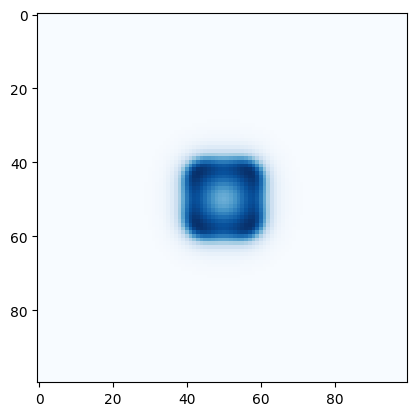

In [12]:
n = 100
reaction.step_n_times(sims_kernel, n)
reaction.show()

## Observations

This reaction seems similar to the heat dispersion experiment, but instead of uniformly dispersing outwards, it constantly creates waves. The center where the "b" chemical began is not the maximum throughout the whole experiment. Rather, the maximum spreads outwards as the simulation is stepped forward.